<h2 style="font-weight: bold;">
    Population trends
</h2>

Borrowed from a [Wikipedia article](https://en.wikipedia.org/wiki/World_population_estimates)

In [51]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [52]:
url = 'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [53]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Estimates of historical world population - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinne

In [54]:
soup.find('table', class_ = "wikitable sortable" )

<table class="wikitable sortable" style="text-align: right;">
<tbody><tr>
<th>Year
</th>
<th>1
</th>
<th>1000
</th>
<th>1500
</th>
<th>1600
</th>
<th>1700
</th>
<th>1820
</th>
<th>1913
</th>
<th>2000
</th>
<th>2030
</th></tr>
<tr>
<td style="text-align: left;"><a href="/wiki/Demographics_of_Asia" title="Demographics of Asia">Asia</a>
</td>
<td>168 <br/> (74%)
</td>
<td>183 <br/> (69%)
</td>
<td>284 <br/> (65%)
</td>
<td>379 <br/> (68%)
</td>
<td>402 <br/> (67%)
</td>
<td>710 <br/> (68%)
</td>
<td>978 <br/> (55%)
</td>
<td>3,605 <br/> (59%)
</td>
<td>4,790 <br/> (59%)
</td></tr>
<tr>
<td style="text-align: left;"><a href="/wiki/East_Asia" title="East Asia">East Asia</a>/<a href="/wiki/Southeast_Asia" title="Southeast Asia">Southeast Asia</a>
</td>
<td>74 <br/> (33%)
</td>
<td>88 <br/> (33%)
</td>
<td>166 <br/> (38%)
</td>
<td>223 <br/> (40%)
</td>
<td>216 <br/> (36%)
</td>
<td>469 <br/> (45%)
</td>
<td>613 <br/> (34%)
</td>
<td>1,996 <br/> (33%)
</td>
<td>2,417 <br/> (30%)
</td></tr>
<t

In [55]:
table_population = soup.find('table', class_ = "wikitable sortable" )

In [56]:
table_population_titles = table_population.find_all('th')

In [57]:
table_population_titles

[<th>Year
 </th>,
 <th>1
 </th>,
 <th>1000
 </th>,
 <th>1500
 </th>,
 <th>1600
 </th>,
 <th>1700
 </th>,
 <th>1820
 </th>,
 <th>1913
 </th>,
 <th>2000
 </th>,
 <th>2030
 </th>]

In [58]:
table_population_titles = [title.text.strip() for title in table_population_titles]

In [59]:
table_population_titles

['Year', '1', '1000', '1500', '1600', '1700', '1820', '1913', '2000', '2030']

In [60]:
table_population_titles[0] = table_population_titles[0] + " " + table_population_titles[1]

In [61]:
table_population_titles

['Year 1', '1', '1000', '1500', '1600', '1700', '1820', '1913', '2000', '2030']

In [62]:
table_population_titles[1] = table_population_titles[0]

In [63]:
table_population_titles = ["Region"] + table_population_titles

In [64]:
table_population_titles

['Region',
 'Year 1',
 'Year 1',
 '1000',
 '1500',
 '1600',
 '1700',
 '1820',
 '1913',
 '2000',
 '2030']

In [65]:
table_population_titles.remove("Year 1")

In [66]:
table_population_titles

['Region',
 'Year 1',
 '1000',
 '1500',
 '1600',
 '1700',
 '1820',
 '1913',
 '2000',
 '2030']

In [67]:
population = pd.DataFrame(columns=table_population_titles)

In [68]:
population

,Region,Year 1,1000,1500,1600,1700,1820,1913,2000,2030


In [69]:
column_data = table_population.find_all('tr')

In [70]:
for row in column_data[1:]:
    column_data_td = row.find_all('td')
    row_data_td = [cell_dt.text.strip() for cell_dt in column_data_td]
    length = len(population)
    population.loc[length] = row_data_td

In [72]:
population.set_index('Region')

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
Asia,168 (74%),183 (69%),284 (65%),379 (68%),402 (67%),710 (68%),978 (55%),"3,605 (59%)","4,790 (59%)"
East Asia/Southeast Asia,74 (33%),88 (33%),166 (38%),223 (40%),216 (36%),469 (45%),613 (34%),"1,996 (33%)","2,417 (30%)"
South Asia,75 (33%),75 (28%),110 (25%),135 (24%),165 (27%),216 (21%),326 (18%),"1,372 (23%)","2,003 (25%)"
Europe[31],34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%),829 (11%)
West Asia,19 (8%),20 (7%),18 (3%),21 (3%),21 (3%),25 (2%),39 (2%),237 (4%),370 (5%)
Africa,17 (8%),32 (12%),47 (11%),55 (10%),61 (10%),74 (7%),125 (7%),798 (13%),"1,449 (18%)"
Central/South America,6 (3%),11 (4%),18 (4%),9 (2%),12 (2%),22 (2%),81 (5%),520 (9%),702 (9%)
North America,1 (0%),1 (0%),2 (0%),2 (0%),1 (0%),11 (1%),105 (6%),314 (5%),413 (5%)
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23 (0%),28 (0%)


<table class="wikitable sortable jquery-tablesorter" style="text-align: right;">

In [73]:
population["Region"]

0                         Asia
1     East Asia/Southeast Asia
2                   South Asia
3                   Europe[31]
4                    West Asia
5                       Africa
6        Central/South America
7                North America
8                      Oceania
9                        World
10           World growth p.a.
Name: Region, dtype: object

In [74]:
population["Region"][3] = "Europe"

In [75]:
population = population.set_index("Region")

In [76]:
population

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
Asia,168 (74%),183 (69%),284 (65%),379 (68%),402 (67%),710 (68%),978 (55%),"3,605 (59%)","4,790 (59%)"
East Asia/Southeast Asia,74 (33%),88 (33%),166 (38%),223 (40%),216 (36%),469 (45%),613 (34%),"1,996 (33%)","2,417 (30%)"
South Asia,75 (33%),75 (28%),110 (25%),135 (24%),165 (27%),216 (21%),326 (18%),"1,372 (23%)","2,003 (25%)"
Europe,34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%),829 (11%)
West Asia,19 (8%),20 (7%),18 (3%),21 (3%),21 (3%),25 (2%),39 (2%),237 (4%),370 (5%)
Africa,17 (8%),32 (12%),47 (11%),55 (10%),61 (10%),74 (7%),125 (7%),798 (13%),"1,449 (18%)"
Central/South America,6 (3%),11 (4%),18 (4%),9 (2%),12 (2%),22 (2%),81 (5%),520 (9%),702 (9%)
North America,1 (0%),1 (0%),2 (0%),2 (0%),1 (0%),11 (1%),105 (6%),314 (5%),413 (5%)
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23 (0%),28 (0%)


In [77]:
population.loc["Asia"]

Year 1      168  (74%)
1000        183  (69%)
1500        284  (65%)
1600        379  (68%)
1700        402  (67%)
1820        710  (68%)
1913        978  (55%)
2000      3,605  (59%)
2030      4,790  (59%)
Name: Asia, dtype: object

In [78]:
population = population.drop(population[population.index == "Asia"].index)
population

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia/Southeast Asia,74 (33%),88 (33%),166 (38%),223 (40%),216 (36%),469 (45%),613 (34%),"1,996 (33%)","2,417 (30%)"
South Asia,75 (33%),75 (28%),110 (25%),135 (24%),165 (27%),216 (21%),326 (18%),"1,372 (23%)","2,003 (25%)"
Europe,34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%),829 (11%)
West Asia,19 (8%),20 (7%),18 (3%),21 (3%),21 (3%),25 (2%),39 (2%),237 (4%),370 (5%)
Africa,17 (8%),32 (12%),47 (11%),55 (10%),61 (10%),74 (7%),125 (7%),798 (13%),"1,449 (18%)"
Central/South America,6 (3%),11 (4%),18 (4%),9 (2%),12 (2%),22 (2%),81 (5%),520 (9%),702 (9%)
North America,1 (0%),1 (0%),2 (0%),2 (0%),1 (0%),11 (1%),105 (6%),314 (5%),413 (5%)
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23 (0%),28 (0%)
World,226,267,438,556,603,"1,041","1,791","6,062","8,175"


In [79]:
population = population.drop(population[population.index == "World"].index)
population

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia/Southeast Asia,74 (33%),88 (33%),166 (38%),223 (40%),216 (36%),469 (45%),613 (34%),"1,996 (33%)","2,417 (30%)"
South Asia,75 (33%),75 (28%),110 (25%),135 (24%),165 (27%),216 (21%),326 (18%),"1,372 (23%)","2,003 (25%)"
Europe,34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%),829 (11%)
West Asia,19 (8%),20 (7%),18 (3%),21 (3%),21 (3%),25 (2%),39 (2%),237 (4%),370 (5%)
Africa,17 (8%),32 (12%),47 (11%),55 (10%),61 (10%),74 (7%),125 (7%),798 (13%),"1,449 (18%)"
Central/South America,6 (3%),11 (4%),18 (4%),9 (2%),12 (2%),22 (2%),81 (5%),520 (9%),702 (9%)
North America,1 (0%),1 (0%),2 (0%),2 (0%),1 (0%),11 (1%),105 (6%),314 (5%),413 (5%)
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23 (0%),28 (0%)
World growth p.a.,,+0.0%,+0.1%,+0.2%,+0.1%,+0.5%,+0.6%,+1.4%,+1.0%


In [81]:
population = population.drop(population[population.index == "World growth p.a."].index)
population

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia/Southeast Asia,74 (33%),88 (33%),166 (38%),223 (40%),216 (36%),469 (45%),613 (34%),"1,996 (33%)","2,417 (30%)"
South Asia,75 (33%),75 (28%),110 (25%),135 (24%),165 (27%),216 (21%),326 (18%),"1,372 (23%)","2,003 (25%)"
Europe,34 (15%),40 (15%),78 (18%),112 (20%),127 (21%),224 (21%),498 (28%),742 (13%),829 (11%)
West Asia,19 (8%),20 (7%),18 (3%),21 (3%),21 (3%),25 (2%),39 (2%),237 (4%),370 (5%)
Africa,17 (8%),32 (12%),47 (11%),55 (10%),61 (10%),74 (7%),125 (7%),798 (13%),"1,449 (18%)"
Central/South America,6 (3%),11 (4%),18 (4%),9 (2%),12 (2%),22 (2%),81 (5%),520 (9%),702 (9%)
North America,1 (0%),1 (0%),2 (0%),2 (0%),1 (0%),11 (1%),105 (6%),314 (5%),413 (5%)
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23 (0%),28 (0%)


In [82]:
population_temp = population.copy()

for column in population_temp.columns.to_list():
    for row in population_temp.index.to_list():
        population_temp.loc[row , column] = population_temp.loc[row , column].split(" ")[0]

In [83]:
population_temp

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia/Southeast Asia,74,88,166,223,216,469,613,"1,996","2,417"
South Asia,75,75,110,135,165,216,326,"1,372","2,003"
Europe,34,40,78,112,127,224,498,742,829
West Asia,19,20,18,21,21,25,39,237,370
Africa,17,32,47,55,61,74,125,798,"1,449"
Central/South America,6,11,18,9,12,22,81,520,702
North America,1,1,2,2,1,11,105,314,413
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5,23,28


In [86]:
year_lst = ["Year 1", "1000","1500","1600","1700","1820","1913"]
population_temp[year_lst] = population_temp[year_lst].astype(float)

In [87]:
population_temp['2000'] = population_temp['2000'].str.replace(',', '').astype(float)
population_temp['2030'] = population_temp['2030'].str.replace(',', '').astype(float)
population_temp

,Year 1,1000,1500,1600,1700,1820,1913,2000,2030
Region,,,,,,,,,
East Asia/Southeast Asia,74.0,88.0,166.0,223.0,216.0,469.0,613.0,1996.0,2417.0
South Asia,75.0,75.0,110.0,135.0,165.0,216.0,326.0,1372.0,2003.0
Europe,34.0,40.0,78.0,112.0,127.0,224.0,498.0,742.0,829.0
West Asia,19.0,20.0,18.0,21.0,21.0,25.0,39.0,237.0,370.0
Africa,17.0,32.0,47.0,55.0,61.0,74.0,125.0,798.0,1449.0
Central/South America,6.0,11.0,18.0,9.0,12.0,22.0,81.0,520.0,702.0
North America,1.0,1.0,2.0,2.0,1.0,11.0,105.0,314.0,413.0
Oceania,0.4,0.4,0.6,0.6,0.6,0.4,5.0,23.0,28.0


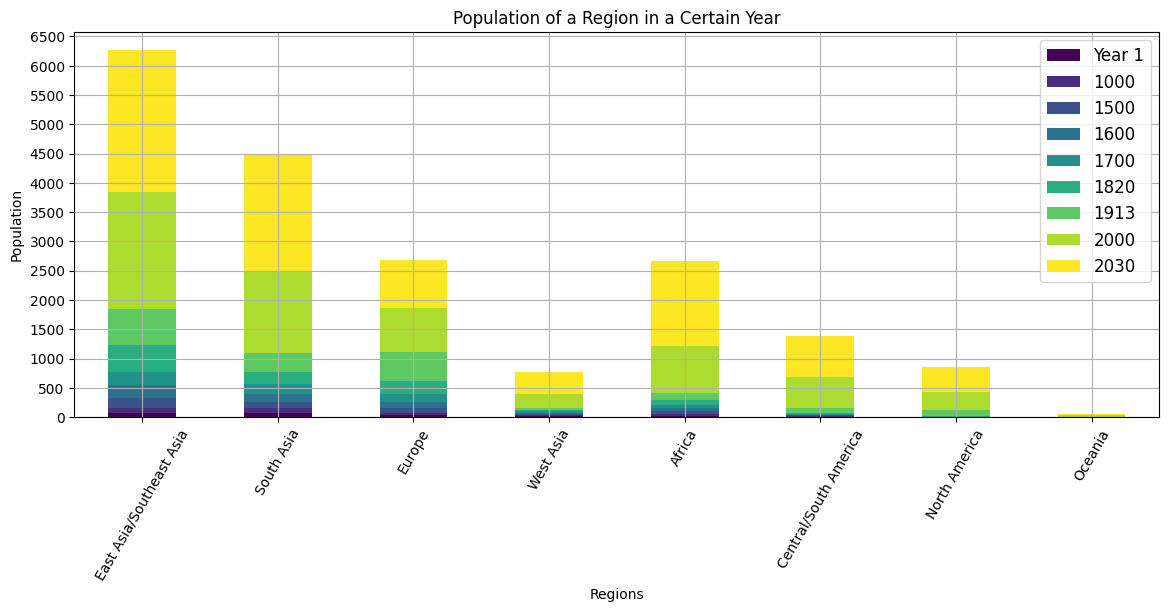

In [89]:

from matplotlib.ticker import MaxNLocator
population_temp.plot(kind="bar", figsize=(14, 5), stacked=True, cmap='viridis')
#plt.subplots(figsize=(20, 5))
plt.xlabel('Regions')
plt.ylabel('Population')
plt.title('Population of a Region in a Certain Year')
plt.grid()
plt.xticks(rotation=60)
plt.legend(fontsize='large')
# Get the current axis
ax = plt.gca()

# Set the maximum number of ticks on the y-axis
ax.yaxis.set_major_locator(MaxNLocator(nbins=15)) 

plt.show()